## 학습목표
1. Boston 주택 가격 예측 모델

2. Reuters 딥러닝 모델

3. CIFAR10 딥러닝 모델

## 10-2. Boston 주택 가격 예측 모델
- Boston 주택 가격 예측 모델에서 사용되는 데이터셋은 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있다.

### 데이터 로드 및 전처리
- 먼저 데이터를 불러와 확인하고 전처리해보자.
- 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용

In [83]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [84]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


- 데이터셋의 전처리를 위해 표준화 작업을 수행한다.

In [85]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
train_data -= mean
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data -= mean
test_data /= std

### 모델 구성 및 컴파일
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일한다.
- Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성한다.

In [86]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 선형 활성화 함수 (회귀 작업)

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

### 모델 학습

In [87]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model.fit(train_data, train_labels, epochs=100,
                    batch_size=2, validation_data=(test_data, test_labels))

Epoch 1/100
202/202 [==============================] - 1s 3ms/step - loss: 210.8621 - mae: 11.2069 - val_loss: 40.5504 - val_mae: 5.0022
Epoch 2/100
202/202 [==============================] - 0s 2ms/step - loss: 31.6509 - mae: 3.6308 - val_loss: 22.5651 - val_mae: 3.7155
Epoch 3/100
202/202 [==============================] - 0s 2ms/step - loss: 21.3472 - mae: 3.0004 - val_loss: 20.2516 - val_mae: 3.3260
Epoch 4/100
202/202 [==============================] - 1s 3ms/step - loss: 18.0968 - mae: 2.7456 - val_loss: 21.1919 - val_mae: 3.3587
Epoch 5/100
202/202 [==============================] - 1s 3ms/step - loss: 15.4940 - mae: 2.6110 - val_loss: 21.4013 - val_mae: 3.1869
Epoch 6/100
202/202 [==============================] - 1s 3ms/step - loss: 13.9787 - mae: 2.5346 - val_loss: 21.6731 - val_mae: 3.2094
Epoch 7/100
202/202 [==============================] - 1s 3ms/step - loss: 12.9835 - mae: 2.4311 - val_loss: 24.8837 - val_mae: 3.3372
Epoch 8/100
202/202 [==============================] 

<ipython-input-88-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


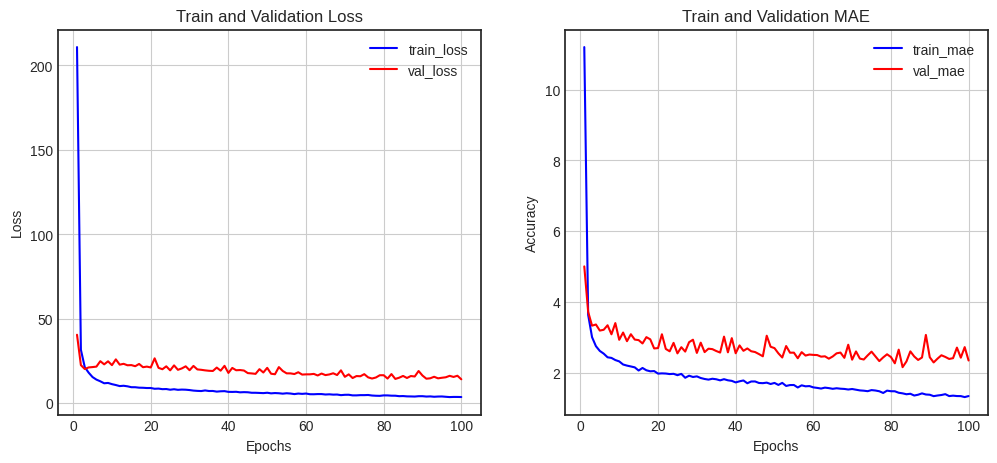

In [88]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [89]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 14.1700 - mae: 2.3405


[14.169986724853516, 2.340527057647705]

## 10-3. Reuters 딥러닝 모델

### 데이터 로드 및 전처리
1. 데이터 로드
2. 훈련 데이터셋 25%를 검증 데이터로 분리
3. 10000개로 제한
4. 데이터셋 분리 작업
5. 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [93]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 데이터 분리 (25%를 검증 데이터로)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터 및 레이블 종류 출력
print("훈련 데이터 개수:", len(train_data))
print("검증 데이터 개수:", len(val_data))
print("테스트 데이터 개수:", len(test_data))
print("레이블 종류의 수:", len(set(train_labels)))

훈련 데이터 개수: 6736
검증 데이터 개수: 2246
테스트 데이터 개수: 2246
레이블 종류의 수: 46


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행한다.
- 원-핫 인코딩 함수를 직접 만들어보자.
- 레이블 데이터들을 범주형 형태로 to_categorical() 함수로 사용해 변환한다.

In [94]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(sequences, dim=10000):
  # [[YOUR CODE]]
  results = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

### 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성한다.

In [95]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Activation('relu'))  # 활성화 함수 추가
model.add(layers.Dropout(0.5))  # Dropout 추가
model.add(layers.Dense(46, activation='softmax', name='output'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_11 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_11 (Activation)  (None, 128)               0         
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 output (Dense)              (None, 46)                5934      
                                                     

### 모델 학습
- ModleCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

In [96]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('Reuters_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=40,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
211/211 [==============================] - 5s 19ms/step - loss: 1.5402 - accuracy: 0.6581 - val_loss: 1.2222 - val_accuracy: 0.7511
Epoch 2/40
  9/211 [>.............................] - ETA: 3s - loss: 0.7615 - accuracy: 0.8333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


211/211 [==============================] - 4s 18ms/step - loss: 0.8458 - accuracy: 0.7991 - val_loss: 0.9518 - val_accuracy: 0.7947
Epoch 3/40
211/211 [==============================] - 4s 21ms/step - loss: 0.5767 - accuracy: 0.8569 - val_loss: 0.9253 - val_accuracy: 0.7996
Epoch 4/40
211/211 [==============================] - 3s 16ms/step - loss: 0.4333 - accuracy: 0.8976 - val_loss: 0.9395 - val_accuracy: 0.8099
Epoch 5/40
211/211 [==============================] - 4s 18ms/step - loss: 0.3286 - accuracy: 0.9195 - val_loss: 1.0458 - val_accuracy: 0.8072
Epoch 6/40
211/211 [==============================] - 4s 19ms/step - loss: 0.2932 - accuracy: 0.9314 - val_loss: 1.0649 - val_accuracy: 0.8139
Epoch 7/40
211/211 [==============================] - 4s 19ms/step - loss: 0.2494 - accuracy: 0.9414 - val_loss: 1.1746 - val_accuracy: 0.8081
Epoch 8/40
211/211 [==============================] - 3s 17ms/step - loss: 0.2305 - accuracy: 0.9458 - val_loss: 1.1711 - val_accuracy: 0.8090
Epoch 9/40

- history를 차트로 시각화

<ipython-input-97-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


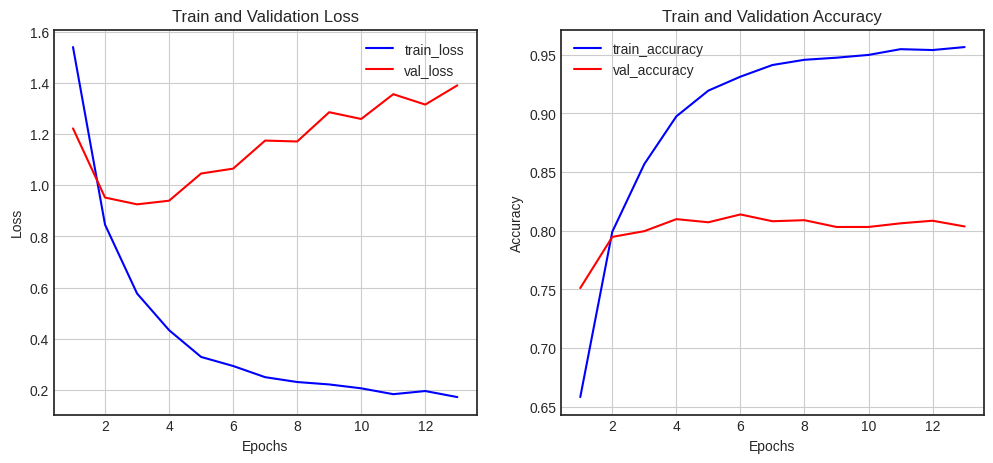

In [97]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
- 테스트 데이터셋을 이용해 모델을 평가한다.

In [98]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 0.9895 - accuracy: 0.7778


[0.9895113110542297, 0.777827262878418]

## 10-4. CIFAR10 딥러닝 모델
- CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어짐
- 데이터셋의 각 이미지는 10개의 클래스로 라벨링

### 데이터 로드 및 전처리
- CIFAR10 데이터셋 로드
- 훈련 데이터셋에서 20%를 검증 데이터셋 분리

In [51]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [68]:
# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터를 훈련 및 검증 데이터로 분리 (20%를 검증 데이터로)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 데이터 차원 출력
print("전체 학습 데이터:", x_train_full.shape, y_train_full.shape)
print("학습 데이터:", x_train.shape, y_train.shape)
print("검증 데이터:", x_val.shape, y_val.shape)
print("테스트 데이터:", x_test.shape, y_test.shape)

전체 학습 데이터: (50000, 32, 32, 3) (50000, 1)
학습 데이터: (40000, 32, 32, 3) (40000, 1)
검증 데이터: (10000, 32, 32, 3) (10000, 1)
테스트 데이터: (10000, 32, 32, 3) (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 클래스를 담는다

In [69]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인

<ipython-input-70-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


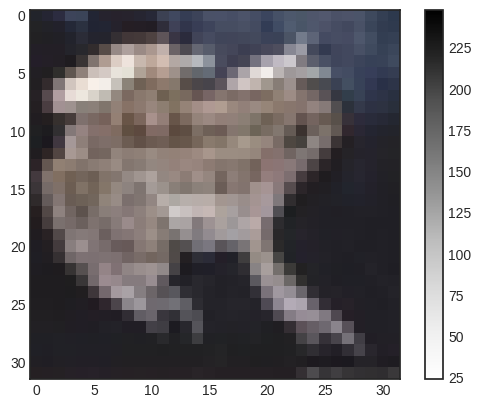

In [70]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [71]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해준다.

In [72]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(x_train[0])

(40000, 3072)
(10000, 3072)
(10000, 3072)
[34 36 43 ... 58 56 58]


In [73]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [75]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(x_train[0])

(40000, 3072)
(10000, 3072)
(10000, 3072)
[0.13333333 0.14117647 0.16862745 ... 0.22745098 0.21960784 0.22745098]


### 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성한다.

In [78]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(512, name='hidden1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 512)               1573376   
                                                                 
 batch_normalization_9 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 hidden2 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_10 (Ba  (None, 128)               512       
 tchNormalization)                                    

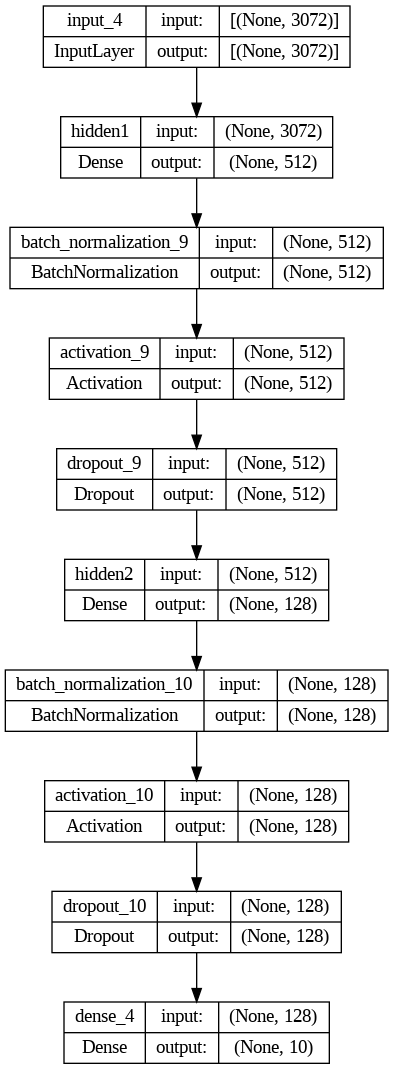

In [79]:
utils.plot_model(model, show_shapes=True)

### 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습 진행

In [80]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
1250/1250 [==============================] - 27s 18ms/step - loss: 2.1013 - accuracy: 0.2706 - val_loss: 1.7112 - val_accuracy: 0.3969
Epoch 2/40
   5/1250 [..............................] - ETA: 18s - loss: 1.9593 - accuracy: 0.3187

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 25s 20ms/step - loss: 1.8362 - accuracy: 0.3381 - val_loss: 1.6496 - val_accuracy: 0.4125
Epoch 3/40
1250/1250 [==============================] - 20s 16ms/step - loss: 1.7623 - accuracy: 0.3659 - val_loss: 1.6860 - val_accuracy: 0.4038
Epoch 4/40
1250/1250 [==============================] - 18s 14ms/step - loss: 1.7178 - accuracy: 0.3851 - val_loss: 1.5826 - val_accuracy: 0.4344
Epoch 5/40
1250/1250 [==============================] - 24s 19ms/step - loss: 1.6871 - accuracy: 0.3949 - val_loss: 1.5478 - val_accuracy: 0.4492
Epoch 6/40
1250/1250 [==============================] - 24s 19ms/step - loss: 1.6607 - accuracy: 0.4032 - val_loss: 1.5380 - val_accuracy: 0.4532
Epoch 7/40
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6396 - accuracy: 0.4117 - val_loss: 1.5133 - val_accuracy: 0.4663
Epoch 8/40
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6223 - accuracy: 0.4187 - val_loss: 1.4983 - val_accura

- history 시각화

<ipython-input-81-520ccc6b2eab>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


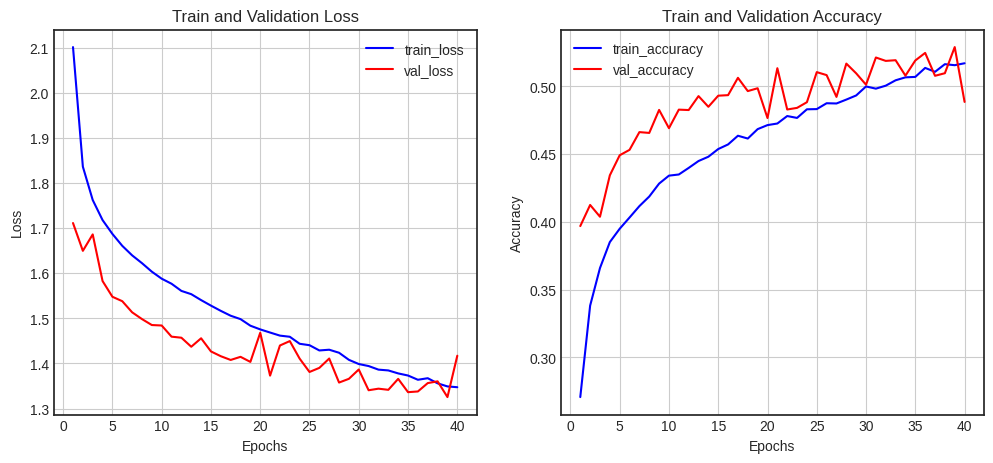

In [81]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [82]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4137 - accuracy: 0.4906


[1.4137060642242432, 0.49059998989105225]

- 지금까지 배운 Dense 레이어만으로는 높은 accuracy를 기대하기 어렵다.
- 이미지 데이터를 다루기 위해서는 이미지에 대한 적합한 CNN 계열의 모델을 사용해야 한다.